In [31]:
% matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

DATASOURCE_PATH = r'F:\DataSource'
FILE_PATH=r'\bank'
FILE_NAME = r'\bank_formatted.csv'


def prepare_data():
    data_set = load_data()
    class_le = LabelEncoder()
    class_lb = LabelBinarizer()
    martial_num = class_le.fit_transform(data_set['marital'].values)
    education_num =class_le.fit_transform(data_set['education'].values)
    contact_num  =class_le.fit_transform(data_set['contact'].values)
    poutcome_num =class_le.fit_transform(data_set['poutcome'].values)
    
    default_bin =class_lb.fit_transform(data_set['default'].values)
    housing_bin = class_lb.fit_transform(data_set['housing'].values)
    loan_bin= class_lb.fit_transform(data_set['loan'].values)
    subscribed_term_deposit_bin=class_lb.fit_transform(data_set['subscribed_term_deposit'].values)
    
    data_set['martial_num']=martial_num
    data_set['education_num']=education_num
    data_set['default_bin']=default_bin
    data_set['housing_bin']=housing_bin
    data_set['loan_bin']=loan_bin
    data_set['contact_num']=contact_num
    data_set['poutcome_num']=poutcome_num
    data_set['subscribed_term_deposit_bin']=subscribed_term_deposit_bin
       
    
    return data_set 
    
def load_data(filename =DATASOURCE_PATH+FILE_PATH+FILE_NAME):
    return pd.read_csv(filename)



data_set  = prepare_data()
data_set.head(22)




,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,subscribed_term_deposit,martial_num,education_num,default_bin,housing_bin,loan_bin,contact_num,poutcome_num,subscribed_term_deposit_bin
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,unknown,no,1,0,0,0,0,0,3,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,failure,no,1,1,0,1,1,0,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,failure,no,2,2,0,1,0,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,unknown,no,1,2,0,1,1,2,3,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,unknown,no,1,1,0,1,0,2,3,0
5,35,management,single,tertiary,no,747,no,no,cellular,23,...,failure,no,2,2,0,0,0,0,0,0
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,...,other,no,1,2,0,1,0,0,1,0
7,39,technician,married,secondary,no,147,yes,no,cellular,6,...,unknown,no,1,1,0,1,0,0,3,0
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,...,unknown,no,1,2,0,1,0,2,3,0
9,43,services,married,primary,no,-88,yes,yes,cellular,17,...,failure,no,1,0,0,1,1,0,0,0


In [32]:
data_set.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed_term_deposit', 'martial_num',
       'education_num', 'default_bin', 'housing_bin', 'loan_bin',
       'contact_num', 'poutcome_num', 'subscribed_term_deposit_bin'],
      dtype='object')

In [33]:
marital_counts = data_set['marital'].value_counts()
marital_counts


married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [34]:
job_counts = data_set['job'].value_counts()
job_counts

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

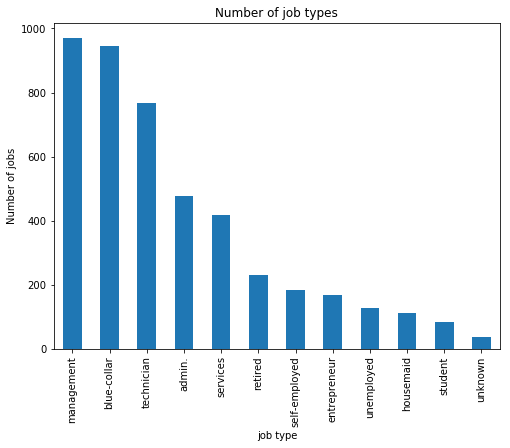

In [35]:
fig = plt.figure(figsize=(8,6)) # define plot area
ax = fig.gca() # define axis    
job_counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of job types') # Give the plot a main title
ax.set_xlabel('job type') # Set text for the x axis
ax.set_ylabel('Number of jobs')# Set text for y axis

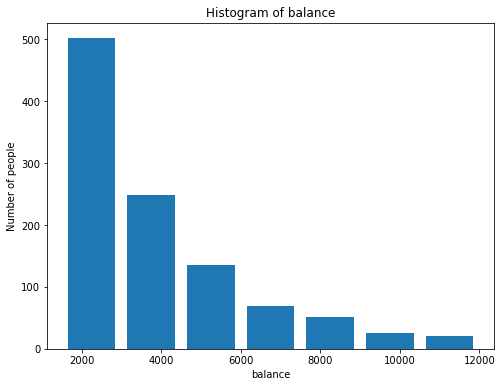

In [39]:
#Histograms
fig = plt.figure(figsize=(8,6)) # define plot area
ax = fig.gca() # define axis  
data_set['balance'].plot.hist(ax = ax,bins=[1500,3000,4500, 6000,7500, 9000, 10500,12000] , histtype='bar', rwidth=0.8) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of balance') # Give the plot a main title
ax.set_xlabel('balance') # Set text for the x axis
ax.set_ylabel('Number of people')# Set text for y axis

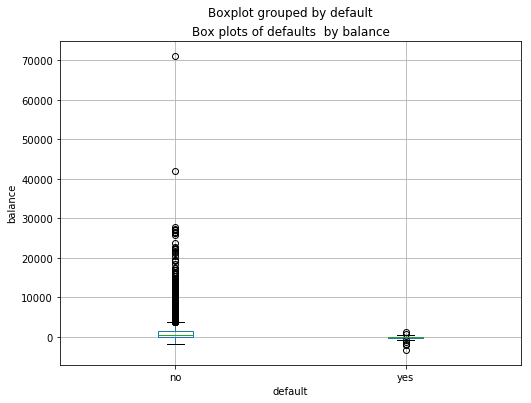

In [43]:
#Box plot
bfig = plt.figure(figsize=(8,6)) # define plot area
ax = bfig.gca() # define axis    
data_set[['balance','default']].boxplot(by = 'default', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of defaults  by balance') # Give the plot a main title
ax.set_xlabel('default') # Set text for the x axis
ax.set_ylabel('balance')# Set text for y axis

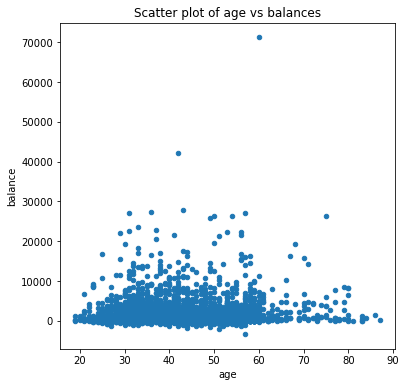

In [48]:

sfig = plt.figure(figsize=(6,6)) # define plot area
ax = sfig.gca() # define axis                   
data_set.plot(kind = 'scatter', x = 'age', y = 'balance', ax = ax)
ax.set_title('Scatter plot of age vs balances') # Give the plot a main title
ax.set_xlabel('age') # Set text for the x axis
ax.set_ylabel('balance')# Set text for y axis

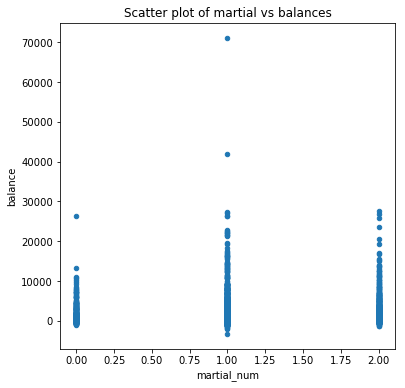

In [49]:
sfig = plt.figure(figsize=(6,6)) # define plot area
ax = sfig.gca() # define axis                   
data_set.plot(kind = 'scatter', x = 'martial_num', y = 'balance', ax = ax)
ax.set_title('Scatter plot of martial vs balances') # Give the plot a main title
ax.set_xlabel('martial_num') # Set text for the x axis
ax.set_ylabel('balance')# Set text for y axis